# Customer Churn Prediction
>
Aditya Azis W

# Importing Libraries

In [1]:
!pip uninstall matplotlib
!pip install matplotlib==3.5.1

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [37]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Basic
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np

# Visualize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab
plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sampling
from imblearn.under_sampling import RandomUnderSampler

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score

import inflection

# Dataset Overview

## Reading Dataset

In [2]:
path = '/content/train.csv'

data_train = pd.read_csv(path)
data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
path2 = '/content/test.csv'

data_test = pd.read_csv(path2)
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

# Exploratory Data Analysis

## Unnecesary Feature Removal

In [6]:
data_test = data_test.drop('id', axis=1)
data_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Duplicate Values Check

In [7]:
data_train.duplicated().sum()

0

In [8]:
data_test.duplicated().sum()

0

## Missing Values Check

In [9]:
data_null_percentage = pd.DataFrame(100*data_train.isna().sum()/data_train.shape[0]).reset_index()
data_null_percentage.columns = ['Column', 'Null_Percentage']
data_null_percentage

,Column,Null_Percentage
0,state,0.0
1,account_length,0.0
2,area_code,0.0
3,international_plan,0.0
4,voice_mail_plan,0.0
5,number_vmail_messages,0.0
6,total_day_minutes,0.0
7,total_day_calls,0.0
8,total_day_charge,0.0
9,total_eve_minutes,0.0


## Extract Number

In [10]:
data_train = data_train.assign(area_code = lambda x: x['area_code'].str.extract('(\d+)'))
data_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [11]:
data_test = data_test.assign(area_code = lambda x: x['area_code'].str.extract('(\d+)'))
data_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## Target Feature

In [12]:
data_test['churn'] = -99
data = data_train.append(data_test, ignore_index=True)
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,GA,130,415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,-99
4996,WA,73,408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,-99
4997,WV,152,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,-99
4998,DC,61,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,-99


In [13]:
data['churn'].replace(['no','yes'],[0,1],inplace=True)
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,GA,130,415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,-99
4996,WA,73,408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,-99
4997,WV,152,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,-99
4998,DC,61,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,-99


### Target Feature Distribution

In [14]:
data_viz = data_train.copy()
data_viz.loc[:,'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'yes' else 'retain')

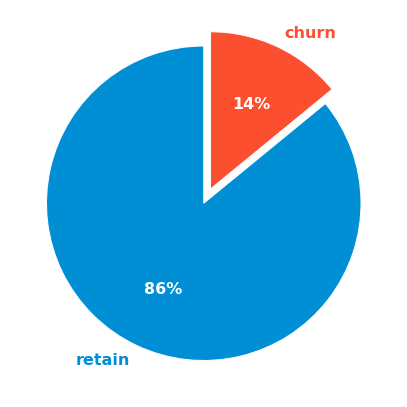

In [15]:
pie_data = data_viz['churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

## Attribute Features

### Numerical Attribute Features

In [16]:
def get_num_cols(data):
    num = list(data.columns[data.dtypes=='int64'])+list(data.columns[data.dtypes=='int32'])+list(data.columns[data.dtypes=='float64'])
    return num

In [17]:
numeric_data = get_num_cols(data_train)
numeric_data

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']

#### Descriptive Statistics

In [18]:
data_train[numeric_data].describe()

,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
count,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000,4250.000
mean,100.236,7.632,99.907,100.176,99.840,4.426,1.559,180.260,30.645,200.174,17.015,200.528,9.024,10.256,2.770
std,39.698,13.440,19.851,19.909,20.093,2.463,1.311,54.012,9.182,50.250,4.271,50.354,2.266,2.760,0.745
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,73.000,0.000,87.000,87.000,86.000,3.000,1.000,143.325,24.365,165.925,14.102,167.225,7.522,8.500,2.300
50%,100.000,0.000,100.000,100.000,100.000,4.000,1.000,180.450,30.680,200.700,17.060,200.450,9.020,10.300,2.780
75%,127.000,16.000,113.000,114.000,113.000,6.000,2.000,216.200,36.750,233.775,19.867,234.700,10.560,12.000,3.240
max,243.000,52.000,165.000,170.000,175.000,20.000,9.000,351.500,59.760,359.300,30.540,395.000,17.770,20.000,5.400


#### Distribution

In [19]:
colors = [
    "#E557C4", # Rose
    "#57C4E5", # Light Blue
    "#293241", # Dark Blue
] 
def hist(data, x, ax, main_color, mean_color=colors[2]):
    
    sns.histplot(data=data_train, x=x, ax=ax, color=main_color, linewidth=1.5, edgecolor="black", bins=50)
    
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"{x} - Count of values", fontsize="medium")
    
    ax.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=False)
    
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.2)

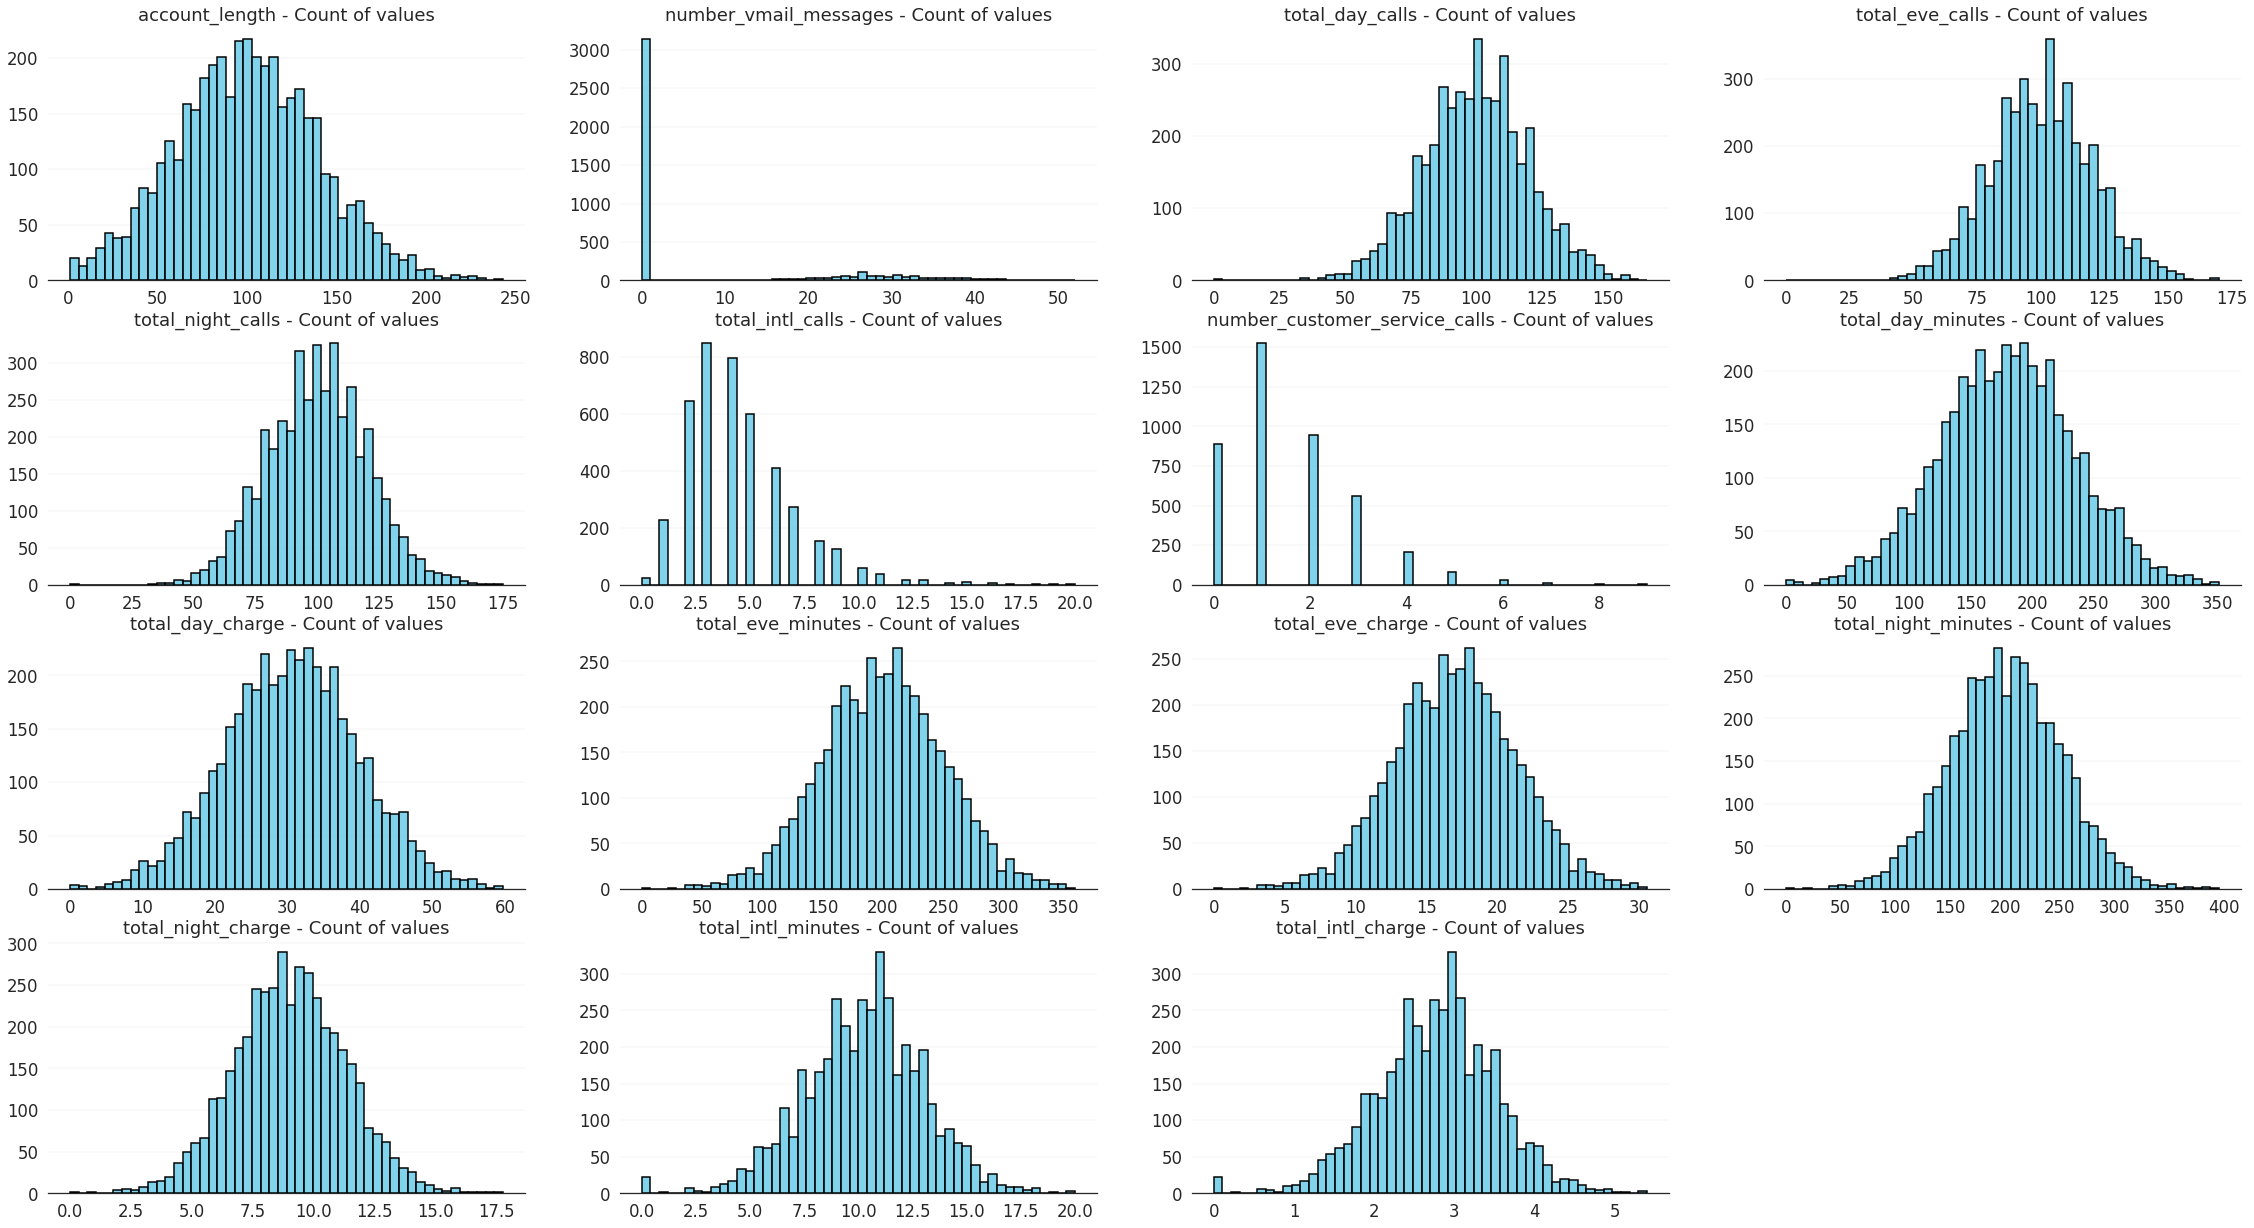

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(35, 20))
for i, num_col in enumerate(numeric_data): 
    
    r_i = i // 4 
    c_i = i % 4
    
    hist(data_train, num_col, axs[r_i][c_i], colors[1])

fig.delaxes(axs[3,3])

plt.show()

In [21]:
skew = []
for col in numeric_data:
    skew.append(round(data_train[col].skew(),3))

num_dist = pd.DataFrame({'feature':numeric_data, 'skewness':skew})
num_dist

,feature,skewness
0,account_length,0.122
1,number_vmail_messages,1.373
2,total_day_calls,-0.086
3,total_eve_calls,-0.021
4,total_night_calls,0.005
5,total_intl_calls,1.360
6,number_customer_service_calls,1.083
7,total_day_minutes,-0.007
8,total_day_charge,-0.007
9,total_eve_minutes,-0.030


In [22]:
gauss_feat = list(num_dist.query('skewness < 0.05 & skewness > -0.05')['feature'])
gauss_feat

['total_eve_calls',
 'total_night_calls',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge']

#### Churn Probability by Numerical Feature

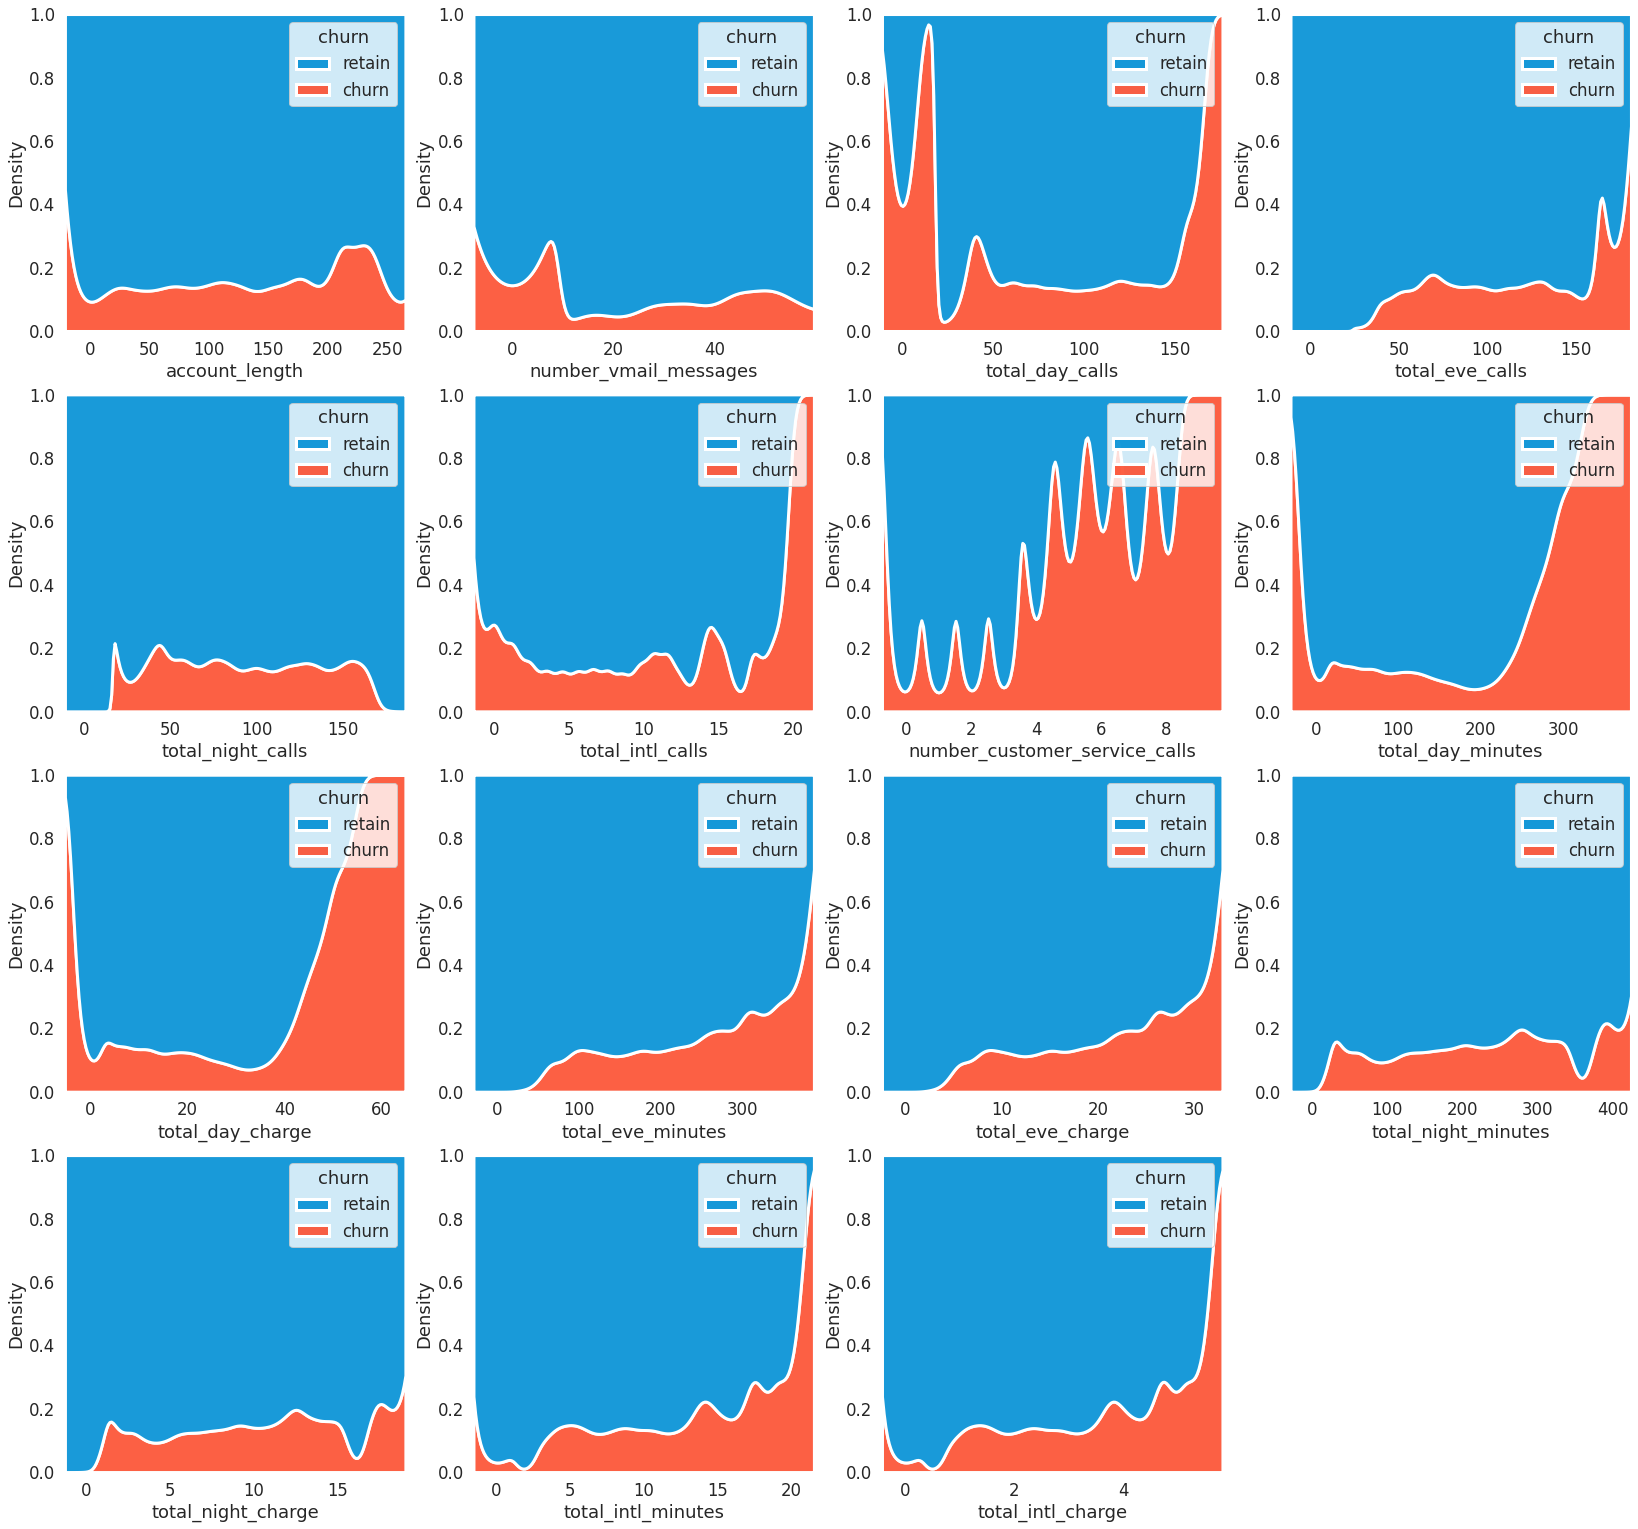

In [23]:
fig, axs = plt.subplots(4, 4, figsize=(25, 25))
#ax.grid(False, axis='x')
for i, num_col in enumerate(numeric_data): 
    
    r_i = i // 4 
    c_i = i % 4

    sns.kdeplot(data=data_viz, x=num_col, hue='churn', multiple='fill', linewidth=3, ax=axs[r_i][c_i], alpha=0.9)
    
    #ax.set_xticks(np.arange(0,data_viz['num_col'].max(),20))
    #ax.set_xlim(data_viz['num_col'].min(),data_viz['num_col'].max())

    #ax.set_yticks(np.linspace(0,1,5))
    #ax.set_ylabel('probability')

    sns.despine(left=True, bottom=True)
fig.delaxes(axs[3,3])
plt.show()

#### Numerical Correlation

<AxesSubplot:>

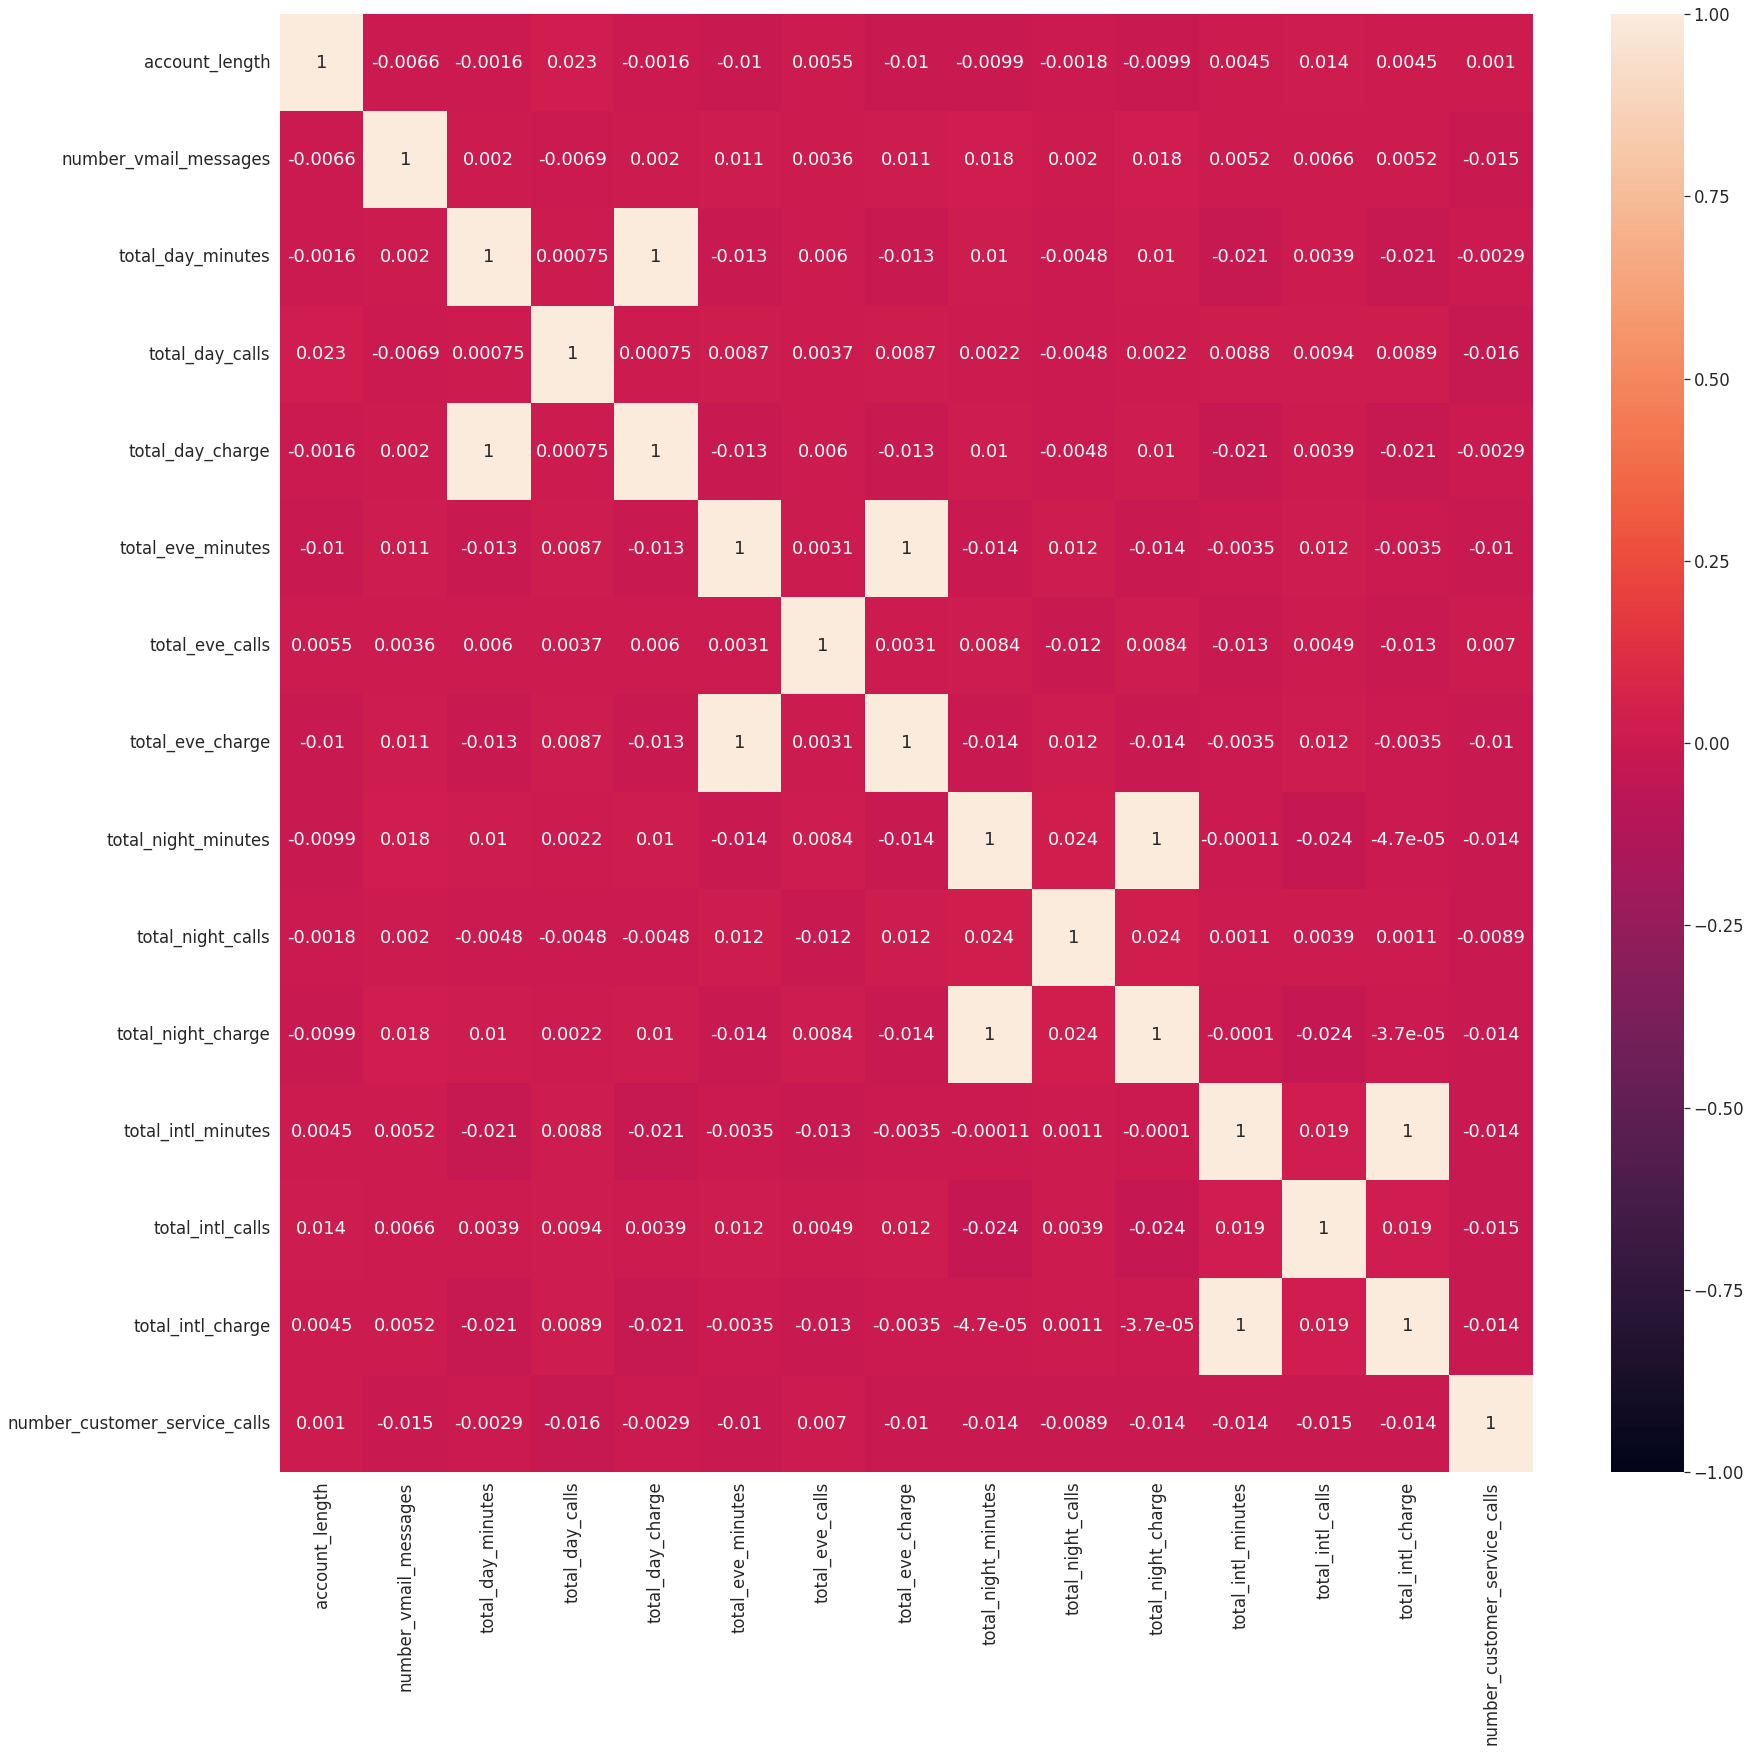

In [24]:
corr = data_train.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [25]:
corr_matrix = data_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop_hicorr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

#### Outlier Detection

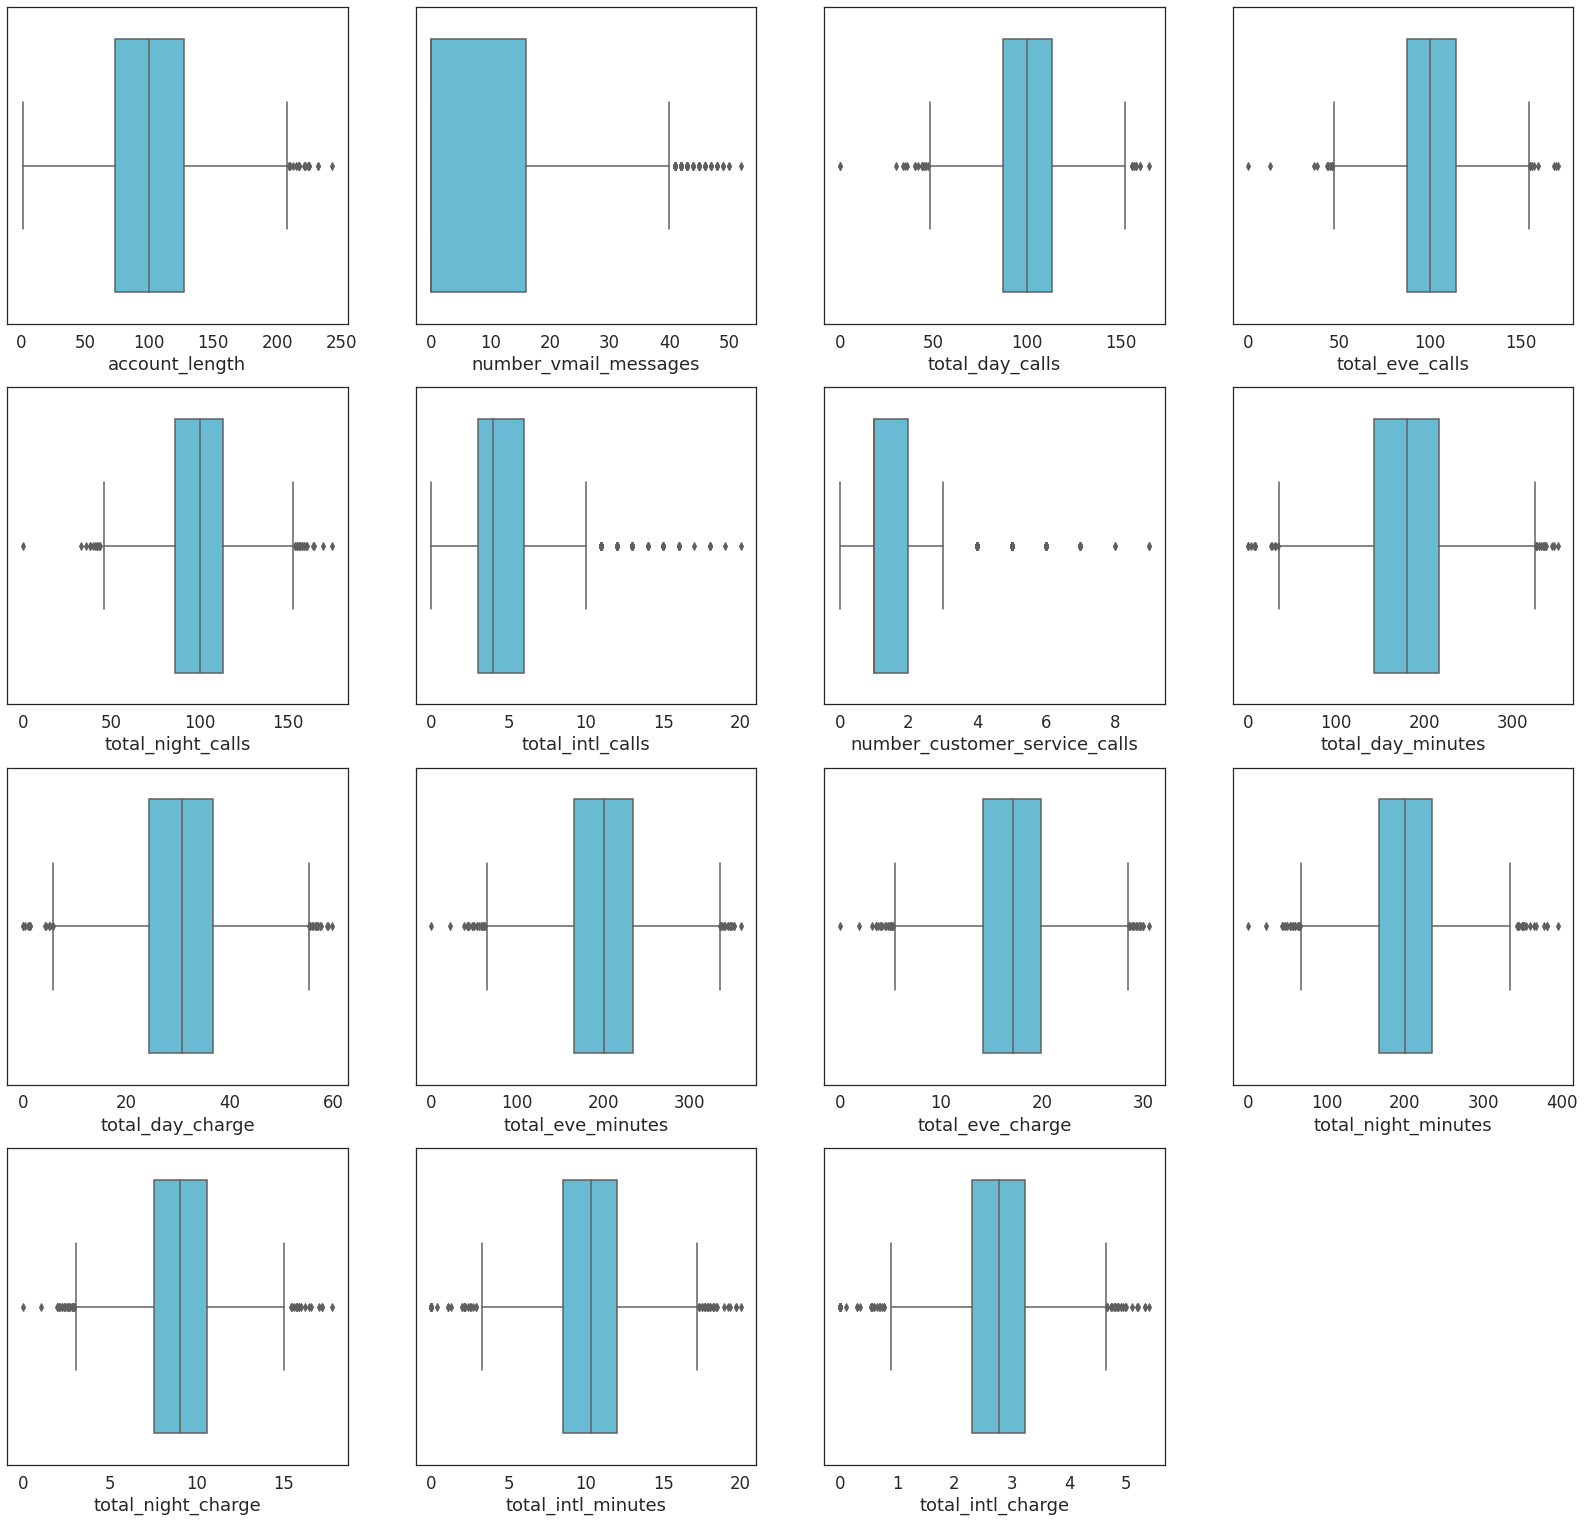

In [26]:
fig, axs = plt.subplots(4, 4, figsize=(25, 25))
for i, num_col in enumerate(numeric_data): 
    
    r_i = i // 4 
    c_i = i % 4

    sns.boxplot(data = data_train,x = data_train[num_col], ax=axs[r_i][c_i], color= '#57C4E5')

fig.delaxes(axs[3,3])

pylab.show()

In [27]:
after_removal_if = data_train

for col in numeric_data:
    stats = data_train[col].describe()
    q1, q3 = stats['25%'], stats['75%']
    iqr = q3-q1
    lower_bound_if = q1 - (1.5 * iqr)
    upper_bound_if = q3 + (1.5 * iqr)
    
    after_removal_if = after_removal_if[(after_removal_if[col] >= lower_bound_if) & (after_removal_if[col] <= upper_bound_if)]

# percentage removed
removed_if = 100*(data_train.shape[0] - after_removal_if.shape[0])/data_train.shape[0]
print('Percentage of removed rows: {}%'.format(round(removed_if,2)))

Percentage of removed rows: 17.29%


### Categorical Attribute Features

In [28]:
def get_cat_cols(data):
    cat = list(data.columns[data.dtypes=='object'])
    return cat

In [29]:
category_data = get_cat_cols(data_train)
category_data = category_data[:-1] 
category_data

['state', 'area_code', 'international_plan', 'voice_mail_plan']

#### Descriptive Statistics

In [30]:
data_train[category_data].describe()

,state,area_code,international_plan,voice_mail_plan
count,4250,4250,4250,4250
unique,51,3,2,2
top,WV,415,no,no
freq,139,2108,3854,3138


#### Distribution

In [31]:
def plot_bar_chart(column_name: str, hue: str=None, top_values: int = None, palette: str = "flare", show_grid : bool = True, 
                   figsize: tuple = (16, 9), bar_font_size: int=14, bar_angle: int=45, angle: int=45):
    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = figsize)
    ax = plt.subplot(1, 1, 1)
    
    ax.set_facecolor((247/255, 247/255, 247/255))
    counts = None
    
    if top_values is not None:
        counts = data_train[column_name].value_counts().iloc[:top_values]
    else:
        counts = data_train[column_name].value_counts()
        
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = data_train[hue] if hue is not None else None) 
    
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize = bar_font_size)
        
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight="bold", fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize = 18)
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize = 27)
    if show_grid: plt.grid()
    plt.show()

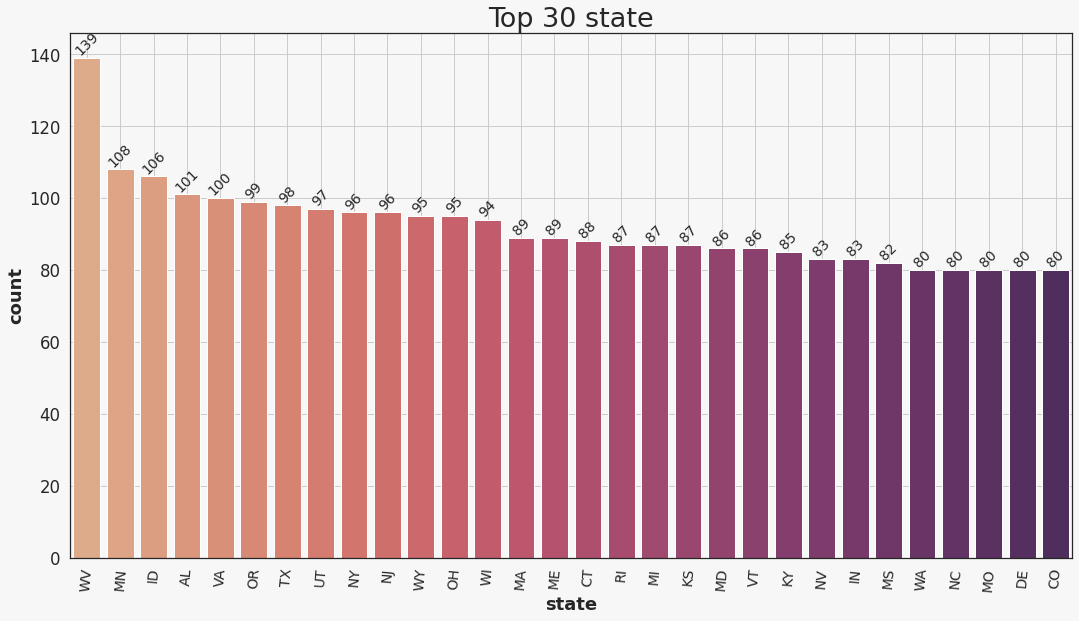

In [32]:
plot_bar_chart(column_name = "state", top_values = 30, palette = "flare", show_grid = True, angle = 85)

In [40]:
def count(df, x, ax, main_color):
    
    sns.countplot(data=data_train, x=x, ax=ax, color=main_color, edgecolor='black', linewidth=1.5)
    
    ax.bar_label(ax.containers[0], color="black", fontsize="large") 
    
    ax.set_ylabel("")
    ax.set_xlabel("")

    ax.set_title(f"{x} - Count of values", fontsize="large", pad=0)
    
    ax.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=False,         
    labelleft=False)
    
    ax.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False
    )
    
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.2)

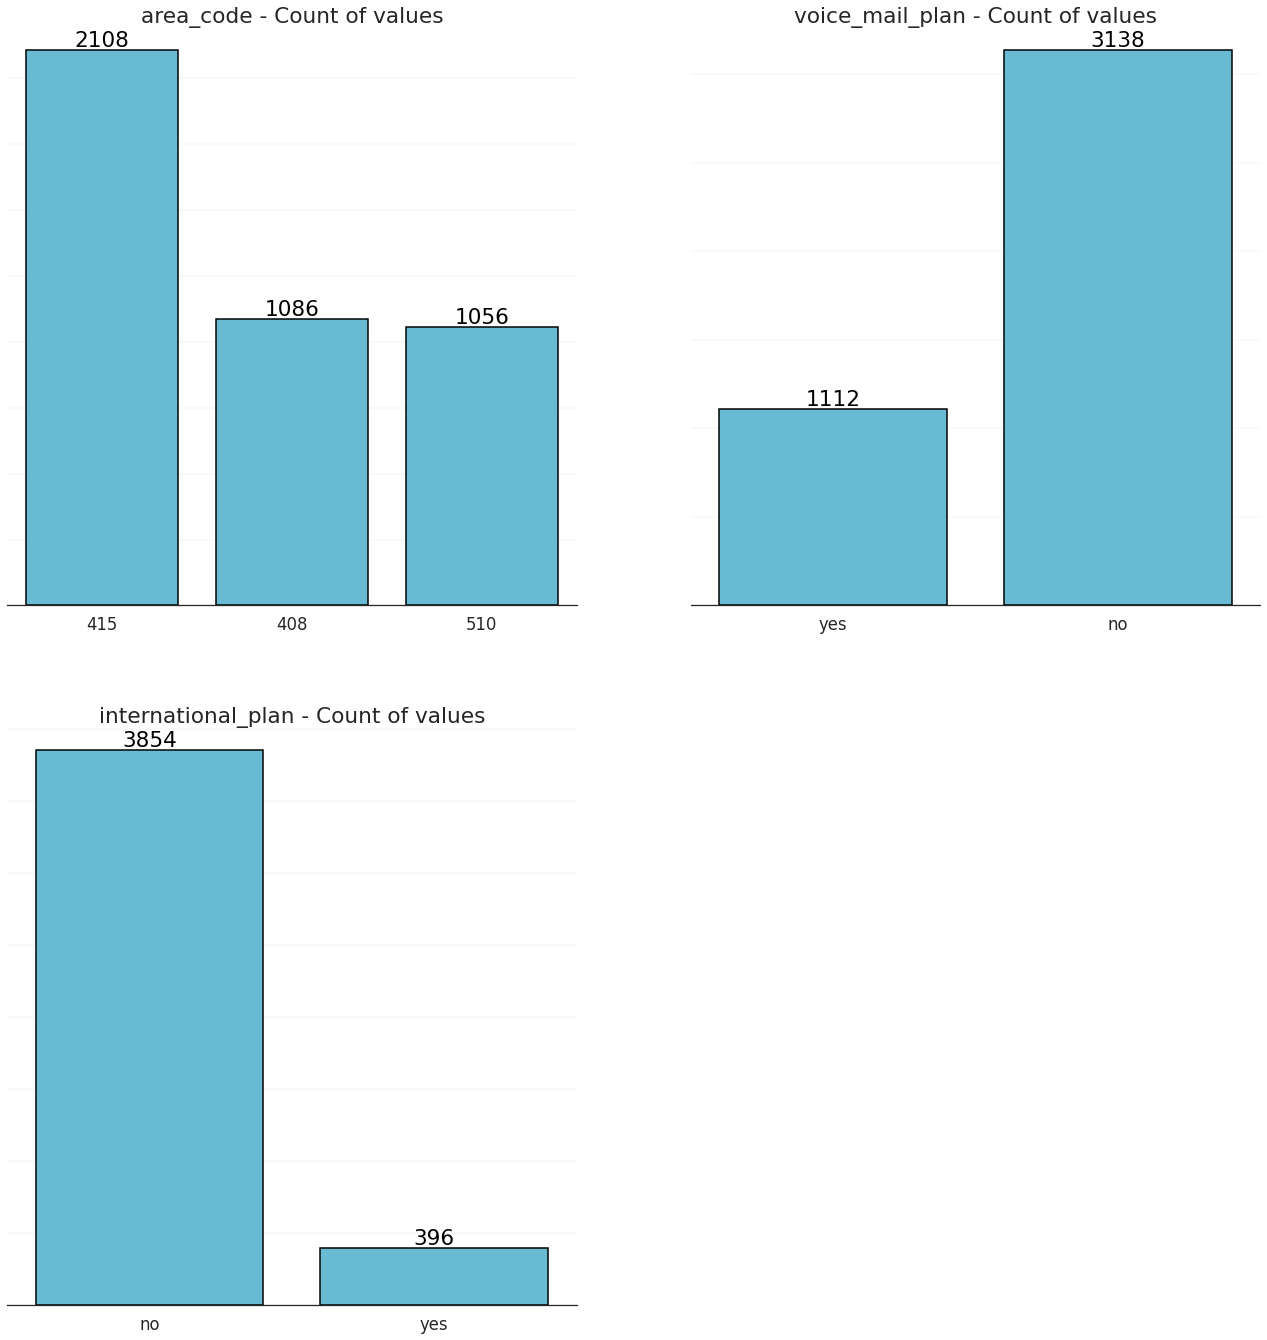

In [42]:
category_data2 = ['area_code','voice_mail_plan','international_plan']
fig, ax = plt.subplots(2, 2, figsize=(20, 22))
for i, cat_col in enumerate(category_data2): 
    
    r_i = i // 2 
    c_i = i % 2

    count(data_train, cat_col, ax[r_i][c_i], colors[1])

fig.delaxes(ax[1,1])
    
pylab.show()

#### Churn Probability by Categorical Feature

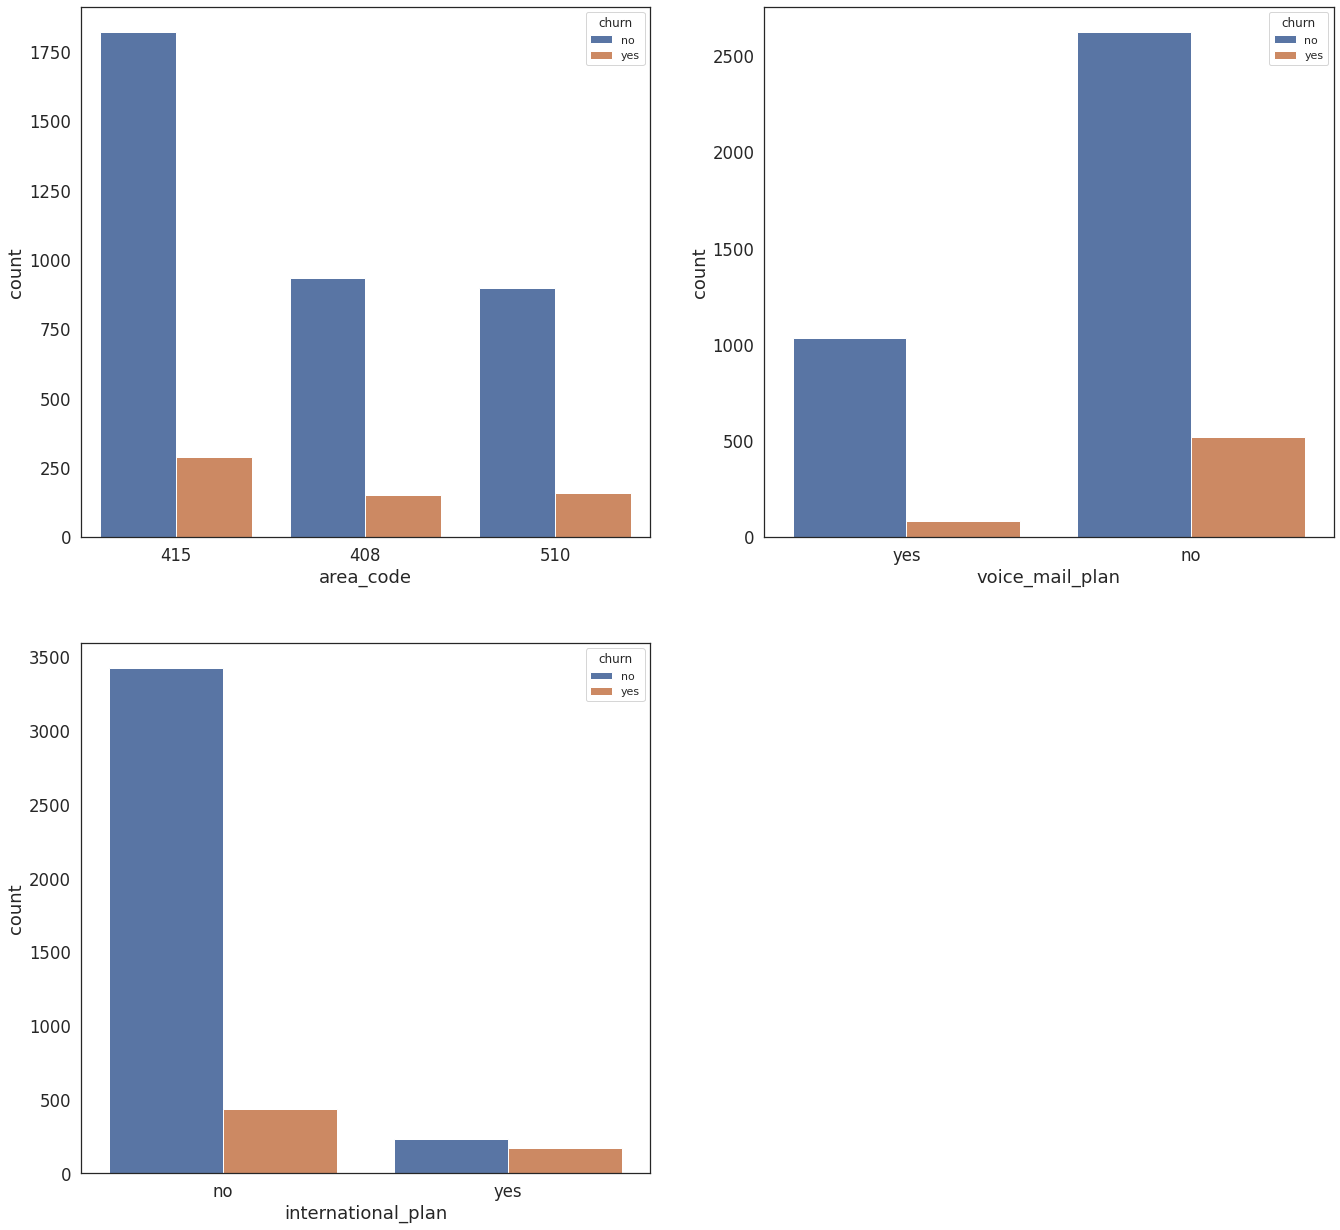

In [35]:
cat_col_biviz=['area_code','voice_mail_plan','international_plan']
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
sns.set_theme(style="whitegrid")
for i, col_biv in enumerate(cat_col_biviz): 
    
    r_i = i // 2 
    c_i = i % 2

    sns.countplot(data=data_train, hue="churn",x = data_train[col_biv], ax=axs[r_i][c_i])
fig.delaxes(axs[1,1])
pylab.show()

In [39]:
columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in category_data:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,International Plan (yes),0.422,0.578
1,State (NJ),0.271,0.729
2,State (CA),0.256,0.744
3,State (WA),0.225,0.775
4,State (MD),0.221,0.779
5,State (MT),0.212,0.787
6,State (OK),0.205,0.795
7,State (NV),0.205,0.795
8,State (SC),0.194,0.806
9,State (TX),0.194,0.806


#Data Preprocessing

## Numerical Data Handling

### Remove Multicolinear Features

In [ ]:
to_drop_hicorr

['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

In [ ]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_eve_minutes              5000 non-null   float64
 9   total_eve_calls                5000 non-null   int64  
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_intl_minutes             5000 non-null   f

In [ ]:
numeric_process = [x for x in numeric_data if x not in to_drop_hicorr]
numeric_process

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes',
 'total_intl_minutes']

### Scaling

In [ ]:
skew_upd = []
for col in numeric_process:
    skew_upd.append(round(data[col].skew(),3))

num_dist_upd = pd.DataFrame({'feature':numeric_process, 'skewness':skew_upd})
num_dist_upd

,feature,skewness
0,account_length,0.109
1,number_vmail_messages,1.350
2,total_day_calls,-0.085
3,total_eve_calls,-0.020
4,total_night_calls,0.002
5,total_intl_calls,1.361
6,number_customer_service_calls,1.042
7,total_day_minutes,-0.012
8,total_eve_minutes,-0.011
9,total_night_minutes,0.019


In [ ]:
std_att = list(num_dist_upd.query('skewness < 0.05 & skewness > -0.05')['feature'])
std_att

['total_eve_calls',
 'total_night_calls',
 'total_day_minutes',
 'total_eve_minutes',
 'total_night_minutes']

#### Standardization

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(data[std_att])
data[std_att] = std_scaler.transform(data[std_att])

In [ ]:
data[std_att].describe()

,total_eve_calls,total_night_calls,total_day_minutes,total_eve_minutes,total_night_minutes
count,5.000e+03,5.000e+03,5.000e+03,5.000e+03,5.000e+03
mean,-1.243e-16,-1.712e-16,-2.309e-16,-6.111e-17,2.089e-16
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-5.054e+00,-5.007e+00,-3.346e+00,-3.969e+00,-3.966e+00
25%,-6.654e-01,-6.474e-01,-6.790e-01,-6.778e-01,-6.629e-01
50%,-9.635e-03,4.049e-03,-3.505e-03,7.190e-03,1.659e-04
75%,6.966e-01,6.555e-01,6.664e-01,6.620e-01,6.791e-01
max,3.521e+00,3.762e+00,3.177e+00,3.226e+00,3.852e+00


#### Normalization

In [ ]:
mm_att = numeric_process
for i in std_att:
    mm_att.remove(i)
mm_att

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_intl_minutes']

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(data[mm_att])
data[mm_att] = mm_scaler.transform(data[mm_att])

In [ ]:
data[mm_att].describe()

,account_length,number_vmail_messages,total_day_calls,total_intl_calls,number_customer_service_calls,total_intl_minutes
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.410,0.149,0.606,0.222,0.174,0.513
std,0.164,0.261,0.120,0.123,0.145,0.138
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.298,0.000,0.527,0.150,0.111,0.425
50%,0.409,0.000,0.606,0.200,0.111,0.515
75%,0.521,0.327,0.685,0.300,0.222,0.600
max,1.000,1.000,1.000,1.000,1.000,1.000


## Categorical Data Handling

### One Hot Encoding

In [ ]:
data = pd.get_dummies(data, columns=['state', 'area_code','international_plan','voice_mail_plan'], 
                      drop_first=False)

In [ ]:
data.head(10)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.438,0.500,-0.347,0.745,-0.102,0.142,1.069,0.154,0.685,0.15,0.111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0.562,0.000,1.171,0.691,-1.572,0.495,-0.748,0.204,0.610,0.25,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,0.343,0.000,2.210,0.430,-2.745,-0.615,-0.069,-0.547,0.330,0.35,0.222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0.306,0.000,-0.252,0.685,-1.035,1.100,-0.267,1.056,0.505,0.15,0.333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0.496,0.462,0.703,0.533,2.925,0.394,0.242,0.906,0.375,0.35,0.333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
5,0.603,0.000,-0.432,0.479,-1.930,-0.312,0.226,-0.196,0.355,0.30,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
6,0.479,0.000,0.078,0.588,2.987,-1.018,0.305,-0.497,0.435,0.20,0.111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
7,0.579,0.712,1.453,0.509,0.423,0.545,2.494,-0.146,0.560,0.25,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
8,0.264,0.000,-0.950,0.830,0.551,-0.867,0.166,0.555,0.635,0.30,0.444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
9,0.302,0.000,0.138,0.770,-0.737,2.412,-0.087,-0.297,0.455,0.25,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
train = data[data['churn']>=0]
train.shape

(4250, 70)

In [ ]:
test = data[data['churn']<0]
test = test.drop('churn', axis=1)
test.shape

(750, 69)

## Train Test Split

In [ ]:
X = train.drop('churn', axis=1)
y = train['churn']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify=y)

In [ ]:
y_train.value_counts()

0    2556
1     419
Name: churn, dtype: int64

## Resampling

In [ ]:
X_rus, y_rus = RandomUnderSampler().fit_resample(X_train, y_train)

In [ ]:
y_rus.value_counts()

0    419
1    419
Name: churn, dtype: int64

# Modelling

## Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_rus, y_rus)

RandomForestClassifier(max_depth=4)

In [ ]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_rus.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
2,total_day_minutes,1.906e-01
10,number_customer_service_calls,1.686e-01
65,international_plan_no,1.389e-01
66,international_plan_yes,1.230e-01
4,total_eve_minutes,5.703e-02
8,total_intl_minutes,2.840e-02
0,account_length,2.815e-02
6,total_night_minutes,2.736e-02
68,voice_mail_plan_yes,2.703e-02
67,voice_mail_plan_no,2.652e-02


## Validation AUC

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

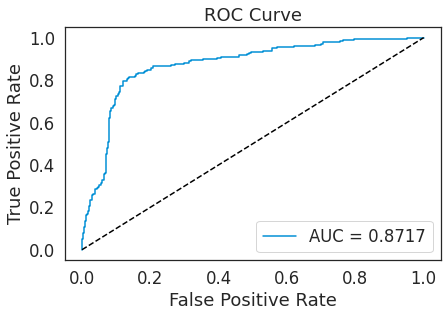

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Model Comparasion

In [ ]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [ ]:
model_list = {
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_rus, y_rus)
  y_pred_list[name] = model.predict(X_test)

score_smote = get_score(y_pred_list, y_test, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Decision Tree,0.826,0.698,0.815,0.727,0.815
Random Forest,0.871,0.747,0.852,0.782,0.852
XGBoost,0.903,0.792,0.869,0.823,0.869
LightGBM,0.907,0.798,0.878,0.830,0.878
